### Nome: Emanuel Piveta Pozzobon
#### Turma: GAMA
#### ID: 24039

#### _<center>Ilum - Escola de Ciência. Campinas, SP. 2024</center>_

------------

### Monstrinho 3.8 -  A função de Himmelblau:

**Objetivo:** Use um algoritmo genético para encontrar as coordenadas (x, y) dos mínimos globais da função de Himmelblau abaixo.

$$
f(x) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
$$

---

### Resolução:

É importante entender desde o início que esse problema é um problema de minimização, assim é importante criar já no inicío a função objetivo desse problema e uma função que calcula $f(x)$ conhecendo x e y:

In [1]:
def funcao_himmelblau(x, y):
    candidato = ((x ** 2 + y - 11)**2) + ((x + y ** 2 - 7)**2)
    return candidato

Podemos tratar esse problema, de forma similar aos das caixas binárias, pode-se gerar um par ordenado de número (x, y), calcular a função de himelblau em cada par ordenado e verificar o mínimo de todos os resultados e o escolhido nesse processo de minimização é selecionado para o hall da fama. 

Para isso é necessário criar uma função que aplique a funcao_himelblau em uma série de pares ordenados e depois selecione o mínimo desses.


É importante se atentar que para esse problema, o número de algarismos por caixa deve se manter igual a 2, pois estamos trabalhando com pares ordenados.

As funções que criamos em sala, para gerar os genes, candidatos, população, cruzamento, mutação, além da seleção e a função objetivo aplicado na população terão que ser alteradas para este problema.

Segue abaixo as funções feitas em aula.

In [2]:
import random
def gene_cb():
    valores_possiveis = [0, 1]
    gene = random.choice(valores_possiveis)
    return gene

def cria_candidato_cb(n):
    candidato = []
    for _ in range(n):
        gene = gene_cb()
        candidato.append(gene)
    return candidato

def populacao_cb(tamanho, numero_de_caixas):
    '''
    Cria uma população para o problema das caixas binárias
    
    Args:
        tamanho: número de indívudos da população
        numero_de_caixas: quantas caixas cada indivíduo da população terá
    '''
    populacao = []
    for _ in range(tamanho):
        populacao.append(cria_candidato_cb(numero_de_caixas))
    return populacao

def funcao_objetivo_pop_cb(populacao):
    '''
    Computa a função objetivo (somar todos os números) para uma população no problema das caixas binárias 
    
    Args:
    população: lista contendo os indivíduos do problema
    '''
    
    fitness = []
    for individuo in populacao:
        fitness.append(funcao_objetivo_cb(individuo))
    return fitness
    
def selecao_roleta_max(populacao, fitness):
    '''
    Realiza a seleção da população por meio da roleta
    
    Args:
    populacao: lista de indivíduos do problema
    fitness: lista com o cálculo da função objetivo para cada indivíduo
    '''
    selecionados = random.choices(populacao, fitness, k=len(populacao))
    return selecionados

def cruzamento_ponto_simples(pai, mae, chance_de_cruzamento):
    '''
    Realiza cruzamento de ponto simples
    
    Args:
        pai: lista contendo um indivíduo
        mãe: lista contendo outro indivíduo
        chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento
    '''
    if random.random() < chance_de_cruzamento:
        corte = random.randint(1, len(mae) - 1)
        filho1 = pai[:corte] + mae[corte:]
        filho2 = mae[:corte] + pai[corte:]
        return filho1, filho2
        
    else:
        return pai, mae

def mutacao_simples_cb(populacao, chance_de_mutacao):
    '''
    Realiza a mutação simples no problema das caixas binárias 
    
    Args:
        população: lista contendo todos os indivíduos
        chance_de_mutacao: float entre 0 e 1 representando a chance de cruzamento
    '''
    for individuo in populacao:
        if random.random() < chance_de_mutacao:
            gene = random.randint(0, len(individuo) - 1)
            individuo[gene] = 0 if individuo[gene] == 1 else 1

-----
### Funções para que o algoritmo genético que resolva o problema.

In [3]:
MIN=-6
MAX=6

In [4]:
def gene_hil(MIN, MAX):
    gene = random.uniform(MIN, MAX)
    return gene

print(gene_hil(MIN, MAX))

-5.057800463523591


In [5]:
def candidato_hil(MIN, MAX):
    x = gene_hil(MIN, MAX)
    y = gene_hil(MIN, MAX)
    candidato_hil = [x, y]
    return candidato_hil

print(candidato_hil(MIN, MAX))

[3.628603478696249, 5.607260887377764]


Vamos agora criar uma população:

In [6]:
def populacao_hil(tamanho, MIN, MAX):
    populacao = []
    for _ in range(tamanho):
        populacao.append(candidato_hil(MIN, MAX))
    return populacao

print(populacao_hil(10, MIN, MAX))

[[3.5659411057083332, -2.4537219712825236], [-2.138886305315885, -1.5410968481065783], [0.8238957042223145, 2.602164196076391], [-3.020222146710522, 2.628935564963964], [2.3783209644643453, -1.4338205903993853], [0.9184738140166679, -1.0590969053014394], [-4.057271228207083, -1.8197066142697746], [-0.6364435544396514, 1.1194135879614873], [4.885006556419576, 4.197781319682676], [-5.38630762918539, 5.856507059179373]]


Com base no objetivo de achar os mínimos globais, vamos criar a função objetivo para ser aplicada na população:

In [7]:
def funcao_objetivo_pop_hil(populacao):
    
    fitness = []
    for individuo in populacao:
        valor_da_funcao = funcao_himmelblau(individuo[0], individuo[1])
        fitness.append(valor_da_funcao)
    return fitness

Agora vamos criar o método de seleção, há duas formas de selecionar os indivíduos que eu encontrei para esse problema, vamos usar a segunda no código de algoritmos genéticos.

In [8]:
def selecao_torneio_min_hil(populacao, fitness):
    fitness_invertido = [1 / (1 + f) for f in fitness] 
    
    selecionados = random.choices(populacao, weights=fitness_invertido, k=len(populacao))
    
    return selecionados

In [9]:
def selecao_torneio_min(populacao, fitness, tamanho_torneio):
    """Faz a seleção de uma população usando torneio.

    Nota: da forma que está implementada, só funciona em problemas de
    minimização.

    Args:
      populacao: lista contendo os individuos do problema
      fitness: lista contendo os valores computados da funcao objetivo
      tamanho_torneio: quantidade de invíduos que batalham entre si

    """
    selecionados = []

    for _ in range(len(populacao)):
        sorteados = random.sample(populacao, tamanho_torneio)

        fitness_sorteados = []
        for individuo in sorteados:
            indice_individuo = populacao.index(individuo)
            fitness_sorteados.append(fitness[indice_individuo])

        min_fitness = min(fitness_sorteados)
        indice_min_fitness = fitness_sorteados.index(min_fitness)
        individuo_selecionado = sorteados[indice_min_fitness]

        selecionados.append(individuo_selecionado)

    return selecionados

Método de cruzamento:


In [10]:
def cruzamento_ponto_simples_hil(pai, mae, chance_de_cruzamento):
    '''
    Realiza cruzamento de ponto simples
    
    Args:
        pai: lista contendo um indivíduo
        mãe: lista contendo outro indivíduo
        chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento
    '''
    if random.random() < chance_de_cruzamento:
        corte = random.randint(1, len(mae) - 1)
        filho1 = pai[:corte] + mae[corte:]
        filho2 = mae[:corte] + pai[corte:]
        return filho1, filho2
        
    else:
        return pai, mae

E também a função de mutação.

In [11]:
def mutacao_simples_hil(populacao, chance_de_mutacao, MIN, MAX):
    '''
    Realiza a mutação simples no problema das caixas binárias 
    
    Args:
        população: lista contendo todos os indivíduos
        chance_de_mutacao: float entre 0 e 1 representando a chance de mutação
    '''
    for individuo in populacao:
        if random.random() < chance_de_mutacao:
            gene = random.randint(0, len(individuo) - 1)
            valor_novo = gene_hil(MIN, MAX)
            while individuo[gene] == valor_novo:
                valor_novo = gene_hil(MIN, MAX)
            individuo[gene] = valor_novo
            

-----------------

### Conhecimentos necessários antes de resolver o problema:

É importante saber que a função Himmelblau possui 4 mínimos globais, que são conhecidos, considere $f$ como a função Himmelblau, segue abaixo seus mínimos globais [1]:

$f(3.0, 2.0) = 0$

$f(-2.805118, 3.131312) = 0$

$f(-3.779310,-3.283186)=0$

$f(3.584428,-1.848126)=0$

Note que os mínimos globais são 0, dessa forma, a imagem dessa função não contém nenhum número negativo, essa função retorna sempre 0 ou número positivos. Mas, não podemos considerar no código que sabemos quais são os mínimos, devemos construir um código de forma que a "máquina" descubra por si mesma o resultado para o programador e cientista.


-----

### Resolução do problema:

Agora que temos as funções necessárias para resolver o problema, vamos criar primeiramente uma população:

In [12]:
TAMANHO_POPULACAO = 1000
NUM_GERACOES = 100
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.3

TAMANHO_TORNEIO = 10

In [13]:
from pprint import pprint
populacao = populacao_hil(tamanho=TAMANHO_POPULACAO, MIN=MIN, MAX=MAX)
#pprint torna mais agradável a visualização de um print de listas 
pprint(populacao)

[[4.162625273497397, 0.9697385732955768],
 [-5.076086219491587, 0.8321140045743434],
 [5.026816026511822, 5.135235951933588],
 [1.233817482485044, 1.9995779773965463],
 [2.8060814268226064, 1.465018386379917],
 [-3.0051914998020313, 1.3951667860508437],
 [0.2765279172599975, 5.697360748059392],
 [5.930642269486237, 4.517179859938826],
 [0.6239059778037888, 0.6152754381024508],
 [2.2067766261967456, -4.973658416958024],
 [-4.846118795585793, 2.351500255785556],
 [0.699703576760867, 0.5522829273262602],
 [-4.227996289714174, -1.0889667504999352],
 [-0.8847715453103566, 3.2699015814692025],
 [-5.1355960775083105, -5.904066633224641],
 [-0.5394350642026806, -2.5338988528966544],
 [-4.664580406965488, 1.7708330157096661],
 [5.723582956238916, 4.9823403724961075],
 [-0.263310964542792, -4.825626482227711],
 [-4.5323810217008, 3.5115967435691715],
 [1.3455001853650943, -4.036244663910518],
 [-5.678408944175427, 1.5542658114895644],
 [5.299272948559906, 3.495365427643849],
 [3.002958405175594,

In [14]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    # Fitness e selecionados da geração
    fitness = funcao_objetivo_pop_hil(populacao)       
    selecionados = selecao_torneio_min(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento da geração para criar a próxima geração
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        # Se não houver cruzamento entre pai e mãe, estes dois seguem na lista de proxima_geração
        individuo1, individuo2 = cruzamento_ponto_simples_hil(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    mutacao_simples_hil(populacao=proxima_geracao, chance_de_mutacao=CHANCE_DE_MUTACAO, MIN=MIN, MAX=MAX)
    
    # Atualização do hall da fama
    fitness = funcao_objetivo_pop_hil(proxima_geracao)
        
    #problema de minimização
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao
    

In [15]:
fitness = funcao_objetivo_pop_hil(hall_da_fama)
maior_fitness = min(fitness)
indice = fitness.index(maior_fitness)
melhor_individuo_observado = hall_da_fama[indice]

melhor_individuo_observado

[2.9995018397022033, 2.0001555113326805]

A função consegue com os parâmetros propostos retornar sempre um valor próximo de algum dos 4 mínimos globais. Se o usuário rodar de novo e de novo o código visualizará que o melhor indivíduo observado sempre é algum dos 4 mínimos globais. Mas queremos que esse algoritmo genético consiga identificar os 4 pares ordenados próximos daqueles que representem os mínimos globais. Dessa forma, de uma forma simples podemos plotar todos os pontos do hall da fama, para refletirmos um pouco.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\Users\emanuel24039\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


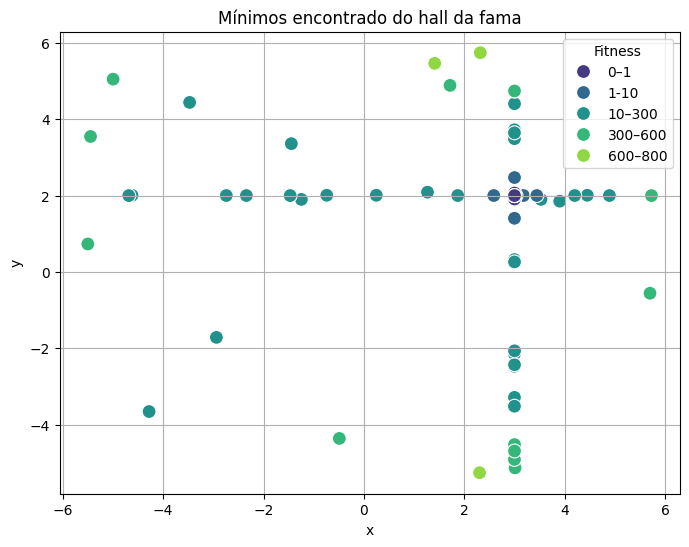

In [17]:
# Separar os pares (x, y) do hall da fama
xs = [ind[0] for ind in hall_da_fama]
ys = [ind[1] for ind in hall_da_fama]

df = pd.DataFrame({'x': xs, 'y': ys, 'medida': fitness})


bins = [0, 1, 10, 300, 600, 800]
labels = ['0–1', '1-10','10–300', '300–600', '600–800']

df['fitness'] = pd.cut(df['medida'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 6))

# Cria o scatter plot
plot = sns.scatterplot(data=df, x='x', y='y', hue='fitness', palette='viridis', s=100)
plt.title("Mínimos encontrado do hall da fama")
plt.grid(True)
plot.legend(title='Fitness')
plt.show()

In [18]:
df

,x,y,medida,fitness
0,1.715138,4.885706,355.477217,300–600
1,-5.499203,0.732888,542.056767,300–600
2,-0.489466,-4.359339,361.187836,300–600
3,-1.246370,1.900086,78.442192,10–300
4,3.527131,1.900086,11.179411,10–300
...,...,...,...,...
95,2.999502,2.000156,0.000008,0–1
96,2.999502,2.000156,0.000008,0–1
97,2.999502,2.000156,0.000008,0–1
98,-4.683085,2.000156,226.242458,10–300


Vamos comparar com o gráfico disponibilizado pelo wikipedia:

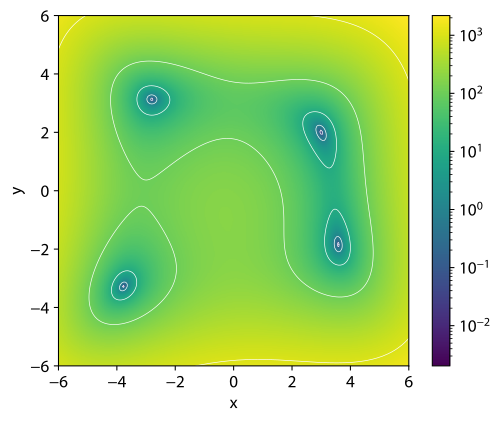

Se o usuário rodar de novo e de novo o kernel perceberá que o gráfico de dispersão as vezes nem sempre se torna tão parecido com a curva de nível em pontos encontrados, apesar disso, o algoritmo sempre é capaz de encontrar pelo menos um mínimo global dos 4 ou mais deles. 

Vamos plotar a título de curiosidade a obtenção dos pontos mínimos conforme variar a quantidade da população, mantendo fixo, as constantes:

NUM_GERACOES = 100

CHANCE_DE_CRUZAMENTO = 0.5

CHANCE_DE_MUTACAO = 0.3

In [19]:
hall_da_fama_geral = []
fitness_geral = []
melhores_individuos = []
populacao_lista = []

NUM_GERACOES = 100
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.3

intervalo = 0
for pop in range(100, 1000, 100):
    populacao_lista.append(pop)
    populacao = populacao_hil(tamanho=pop, MIN=MIN, MAX=MAX)
    
    hall_da_fama = []

    for n in range(NUM_GERACOES):

        # Fitness e selecionados da geração
        fitness = funcao_objetivo_pop_hil(populacao)       
        selecionados = selecao_torneio_min(populacao, fitness, TAMANHO_TORNEIO)
        
        # Cruzamento da geração para criar a próxima geração
        proxima_geracao = []
        for pai, mae in zip(selecionados[::2], selecionados[1::2]):
            # Se não houver cruzamento entre pai e mãe, estes dois seguem na lista de proxima_geração
            individuo1, individuo2 = cruzamento_ponto_simples_hil(pai, mae, CHANCE_DE_CRUZAMENTO)
            proxima_geracao.append(individuo1)
            proxima_geracao.append(individuo2)
        
        # Mutação
        mutacao_simples_hil(populacao=proxima_geracao, chance_de_mutacao=CHANCE_DE_MUTACAO, MIN=MIN, MAX=MAX)
        
        # Atualização do hall da fama
        fitness = funcao_objetivo_pop_hil(proxima_geracao)
            
        #problema de minimização
        menor_fitness = min(fitness)
        indice = fitness.index(menor_fitness)
        hall_da_fama.append(proxima_geracao[indice])    
        
        # Encerramento
        populacao = proxima_geracao
    hall_da_fama_geral.append(hall_da_fama)

    # Corrigido: fitness dos indivíduos do hall da fama
    fitness_hall = funcao_objetivo_pop_hil(hall_da_fama)
    fitness_geral.append(fitness_hall)

    # Melhor indivíduo da execução
    menor_fitness = min(fitness_hall)
    indice = fitness_hall.index(menor_fitness)
    melhor_individuo_observado = hall_da_fama[indice]
    melhores_individuos.append(melhor_individuo_observado)

In [20]:
# Separar os pares (x, y) do hall da fama
xs = []
ys = []
for i in range(len(hall_da_fama_geral)):
    xs.append([ind[0] for ind in hall_da_fama_geral[i]])
    ys.append([ind[1] for ind in hall_da_fama_geral[i]])


In [21]:
df = []
for i in range(len(hall_da_fama_geral)):
    # Criando o DataFrame diretamente e adicionando-o à lista
    df.append(pd.DataFrame({'x': xs[i], 'y': ys[i], 'medida': fitness_geral[i]}))

bins = [0, 1, 10, 300, 600, 800]
labels = ['0–1', '1-10','10–300', '300–600', '600–800']

for i in range(len(df)):
    df[i]['fitness'] = pd.cut(df[i]['medida'], bins=bins, labels=labels, include_lowest=True)


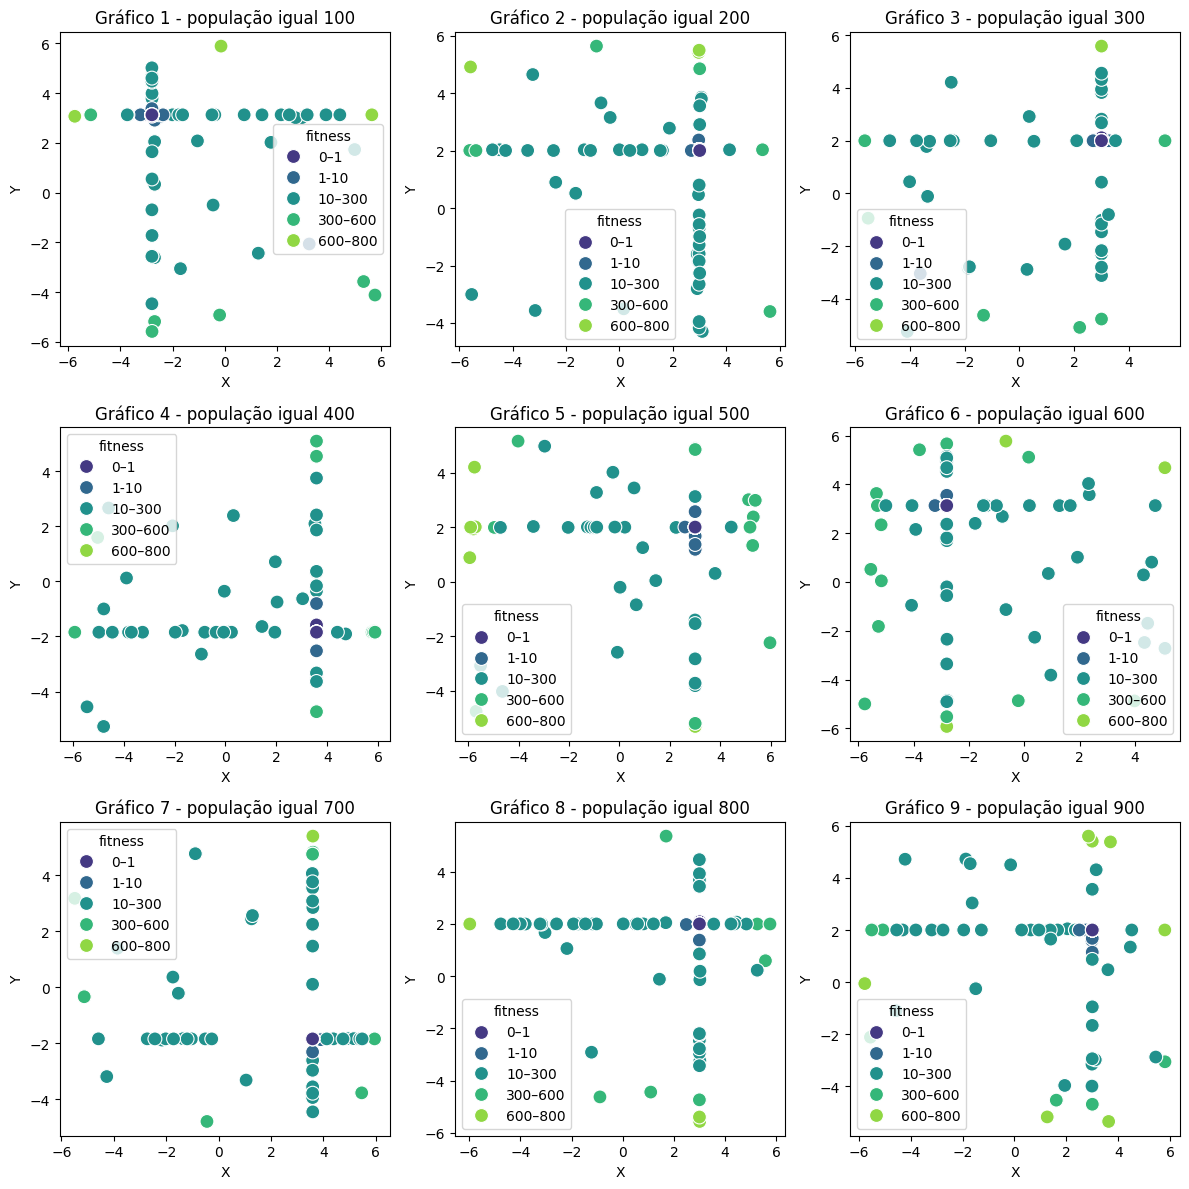

In [22]:

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

contador = 0
# Plotando 9 gráficos de dispersão
for i in range(3):
    for j in range(3):
        sns.scatterplot(x='x', y='y', data=df[contador], hue='fitness', palette='viridis', s=100, ax=axs[i, j])
        axs[i, j].set_title(f'Gráfico {i*3 + j + 1} - população igual {populacao_lista[contador]}')
        axs[i, j].set_xlabel('X')
        axs[i, j].set_ylabel('Y')
        
        contador+=1

plt.tight_layout()
plt.show()

A partir dessa figura é possível visualizar que pela natureza probabilística que mesmo alterando a população inicial, a configuração dos pontos pontos mínimos obtidos é alterada sempre. No entanto, é visível que não é possível conseguir os 4 pontos necessariamente na mesma população de hall da fama. 

----
### Conclusão: 

É possível admitir que foi possível sim identificar os mínimos globais, mas pela natureza probabílistica e dos parâmetros selecionados que foi não possível identificar os 4 minimos globais em conjunto no algoritmo. Apesar disso, sempre foi possível identificar ao menos um mínimo global ao executar o código. Á vista disso, será feito a tentativa de identificar os 4 mínimos globais em conjunto usando o operador genetico de migração na fera formidável 4.15.

-----
-----

### Nome: Emanuel Piveta Pozzobon
#### Turma: GAMA
#### ID: 24039

#### _<center>Ilum - Escola de Ciência. Campinas, SP. 2024</center>_

------------

### 4.15 - Fera Formidável: Vai pra lá ou vem pra cá!

**Objetivo:**  Implemente o operador genético de migração no código de algoritmo
genético desenvolvido nesta disciplina (isto é, não é para usar o DEAP). Conte para o
leitor sobre como a sua implementação funciona e mostre ela em ação.

-----

### Introdução:

A operação conhecida como migração em algoritmos genéticos é a cada geração copiar ou trocar indivíduos entre populações de invidíduos [2]. Dessa forma, invés de ter somente uma população ao longo das gerações, é criado mais de uma população. Essa técnica é conhecida também como modelo de ilhas, ela explora o paralelismo explícito em algoritmos genéticos. Esta abordagem divide a população inicial em sub-populações (ou ilhas) e elas evoluem com algoritmos genéticos de forma paralela, ao mesmo tempo ao longo das gerações como dito anteriormente, é "migrado" indivíduos de uma população para outra. E isso pode ser feito de inúmeras formas, o procedimento que será utilizado aqui neste problema será a comunicação em anel como representado na imagem abaixo, no qual cada ilha envia os melhores indivíduos para a ilha a seguir e recebe os melhores indivíduos da anterior a cada geração.

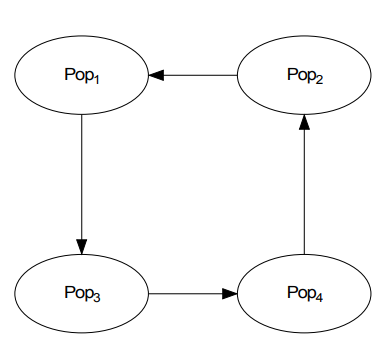

-----
### Resolução:

As constantes que utilizaremos são as seguintes, e vamos definir um total de 20  populações diferentes.

In [23]:
NUM_POPULACOES= 20
TAMANHO_CADA_POPULACAO = 100
NUM_GERACOES = 200

CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.1
TAMANHO_TORNEIO = 5

Vamos primeiramente criar todas as nossas populações.

In [24]:
def fazer_ilhas(NUM_POPULACOES, TAMANHO_CADA_POPULACAO):
    '''
    Função que recebe a quantidade de populações que o usuário quer criar e retorna um dicionário das populações
    
    Args:
    -NUM_POPULACOES: número de populações
    
    Returns:
    - Dicionário ilhas: chaves são a identificação da população e os items são os indivíduos.
    '''
    ilhas = dict()
    for i in range(NUM_POPULACOES):
        populacao = populacao_hil(tamanho=TAMANHO_CADA_POPULACAO, MIN=MIN, MAX=MAX)
        ilhas[f'populacao {i}'] = populacao
        
    return ilhas

In [25]:
ilhas = fazer_ilhas(NUM_POPULACOES, TAMANHO_CADA_POPULACAO)
print(ilhas)

{'populacao 0': [[-4.059794150859634, -4.986548822054516], [-1.2511369628811453, 0.254995130461257], [-0.2373136319077478, -2.1762686579588784], [1.49736885704141, -4.317369706093288], [-2.8400883315404863, 1.9600433905547678], [-3.0760377259047837, -2.34704493554339], [-0.16682571385974576, 1.6213426462892961], [-3.9069466729979845, 3.9436679487124504], [4.236532315349054, -4.745489120012198], [-5.27947501646532, -4.5367049774452965], [3.062878089731443, -1.1002297258119782], [-1.0464309152760212, -1.3861899652008844], [-1.1904367650484744, 2.546851531561], [-5.935578287235728, -3.4968933633409782], [-2.4112344116757685, 0.5113194909294876], [3.6291863186027378, -5.455515230407115], [1.1035590734240017, 0.9920088679822054], [-4.641415749129948, 5.885591074946905], [3.356196083878878, -1.143239262290602], [4.624555230024312, 2.1254325509379974], [5.319149637170149, -5.007481073430792], [-4.650604689380414, 5.445620403495095], [5.870989299118719, 3.539882817357352], [-1.3862345928638273

Da mesma forma, cada população precisa de um hall da fama, que são os melhores indivíduos. Assim, criaremos um hall da fama em dicionários também.

In [26]:
def fazer_hall_da_fama_pop():  
    hall_da_fama_pop = dict()
    for i in range(len(ilhas)):
        hall_da_fama_pop[f'hall da fama {i}'] = []
    return hall_da_fama_pop

print(fazer_hall_da_fama_pop())

{'hall da fama 0': [], 'hall da fama 1': [], 'hall da fama 2': [], 'hall da fama 3': [], 'hall da fama 4': [], 'hall da fama 5': [], 'hall da fama 6': [], 'hall da fama 7': [], 'hall da fama 8': [], 'hall da fama 9': [], 'hall da fama 10': [], 'hall da fama 11': [], 'hall da fama 12': [], 'hall da fama 13': [], 'hall da fama 14': [], 'hall da fama 15': [], 'hall da fama 16': [], 'hall da fama 17': [], 'hall da fama 18': [], 'hall da fama 19': []}


Vamos agora de fato produzir o algoritmo genético

In [27]:
# criar novas ilhas de populações
ilhas = fazer_ilhas(NUM_POPULACOES, TAMANHO_CADA_POPULACAO)
# criar hall da fama em dicionario:
hall_da_fama_pop = fazer_hall_da_fama_pop()
# Rodar cada geração
# lista do hall da fama que terá todos os melhores indivíduos de cada população, computando todos
hall_da_fama_de_todos_os_famosos = []
for n in range(NUM_GERACOES):
    # Rodar cada população em uma única geração
    for i in range(len(ilhas)):
        hall_da_fama_da_geracao = []
        
        fitness = funcao_objetivo_pop_hil(ilhas[f'populacao {i}'])
        
        selecionados = selecao_torneio_min(ilhas[f'populacao {i}'], fitness, TAMANHO_TORNEIO)
        proxima_geracao = []
        for pai, mae in zip(selecionados[::2], selecionados[1::2]):
            # Se não houver cruzamento entre pai e mãe, estes dois seguem na lista de proxima_geração
            individuo1, individuo2 = cruzamento_ponto_simples_hil(pai, mae, CHANCE_DE_CRUZAMENTO)
            proxima_geracao.append(individuo1)
            proxima_geracao.append(individuo2)
        # Mutação
        mutacao_simples_hil(populacao=proxima_geracao, chance_de_mutacao=CHANCE_DE_MUTACAO, MIN=MIN, MAX=MAX)
        
        # Atualização do fitness
        fitness = funcao_objetivo_pop_hil(proxima_geracao)
        
        # Problema de minimização e atualiza hall da fama
        menor_fitness = min(fitness)
        indice = fitness.index(menor_fitness)
        hall_da_fama_da_geracao.append(proxima_geracao[indice]) 
        
        hall_da_fama_de_todos_os_famosos.append(proxima_geracao[indice])
    
        # Encerramento da população e retira da proxima geração o hall da fama, para já entregar a geração com migração
        proxima_geracao.pop(indice)
        ilhas[f'populacao {i}'] = proxima_geracao
        
        # Encerramento do hall da fama, adicionando somente um único elemento ao dicionário
        # dessa foma o hall_da_fama_pop terá o histórico de melhor indivíduo em cada geração para cada população
        hall_da_fama_pop[f'hall da fama {i}'].append(hall_da_fama_da_geracao[0])
        
    # Após todas as populações evoluírem por uma geração de algoritmos genéticos, todas elas já não possuem o termo 
    # que irá migrar por causa das linhas:  proxima_geracao.pop(indice) e ilhas[f'populacao {i}'] = proxima_geracao
    
    # agora é importante adicionar as populações do dicionarios os melhores elementos de forma que cada populução receba do
    # termo anterior.
    pop = 1
    for chave, valor in hall_da_fama_pop.items():
        ultimo_famoso = valor[-1]
        chave_ilha = f'populacao {pop if pop < NUM_POPULACOES else 0}'
        ilhas[chave_ilha].append(ultimo_famoso)
        pop += 1
    
from pprint import pprint

print("===== ILHAS =====")
pprint(ilhas, width=10000)

print("\n" + "-=-"*40 + "\n")

print("===== HISTÓRICO HALL DA FAMA DE CADA POPULAÇÃO =====")
pprint(hall_da_fama_pop, width=10000)

===== ILHAS =====
{'populacao 0': [[3.000565293011988, 1.9994762238688395], [3.3142120500740795, 1.9994762238688395], [3.000565293011988, 1.9994762238688395], [3.000565293011988, 1.9994762238688395], [-0.5184734480987583, 1.9994762238688395], [3.000565293011988, 1.9994762238688395], [3.000565293011988, 1.0581991916686544], [3.000565293011988, 2.2554060754033873], [3.000565293011988, 1.9994762238688395], [3.000565293011988, -3.185304503203665], [2.81560042785965, 1.9994762238688395], [3.000565293011988, 1.9994762238688395], [3.000565293011988, 1.9994762238688395], [-3.207357189187686, 1.9994762238688395], [3.000565293011988, 1.9994762238688395], [3.000565293011988, 1.9994762238688395], [3.000565293011988, 1.9994762238688395], [3.000565293011988, -3.185304503203665], [3.000565293011988, 1.9994762238688395], [3.000565293011988, 1.9994762238688395], [3.000565293011988, 1.9994762238688395], [-1.2129586405377175, 1.9994762238688395], [3.000565293011988, 1.9994762238688395], [3.00056529301198

O dicionário hall_da_fama_pop() armazena o melhor indivíduo em cada geração em cada população. Vamos verificar o histórico dos valores de fitness deles, isto é, o valor da função de hilmemblau em cada melhor indivíduo de cada população. É importante destacar que esses indivíduos são os que foram migrados para as populações seguintes.

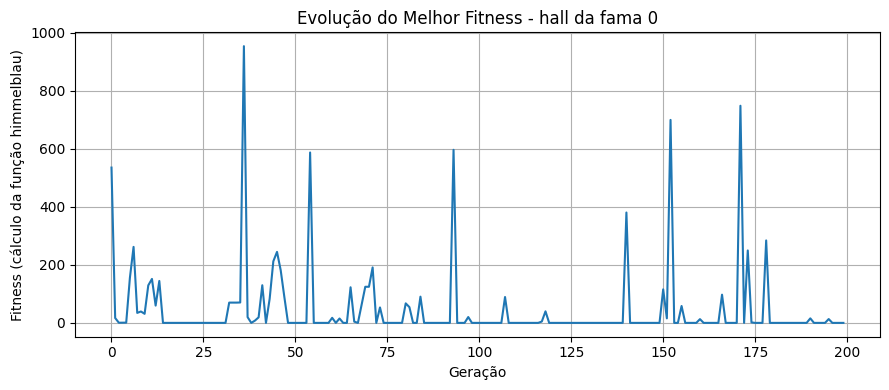

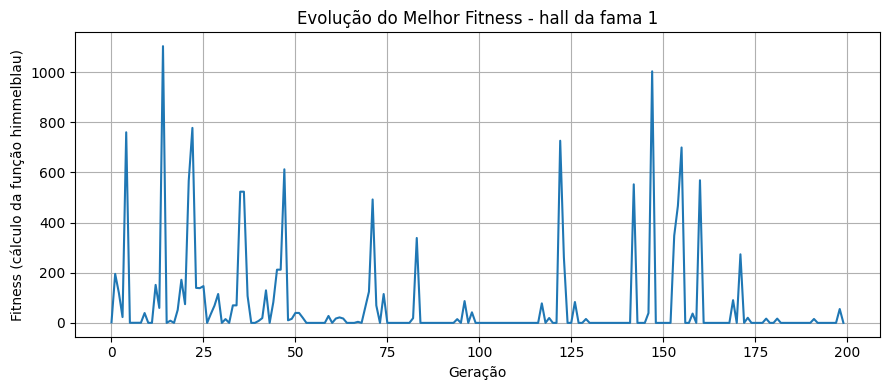

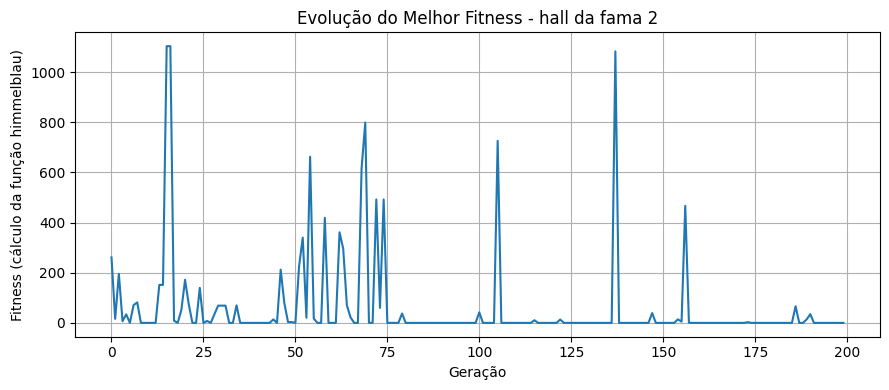

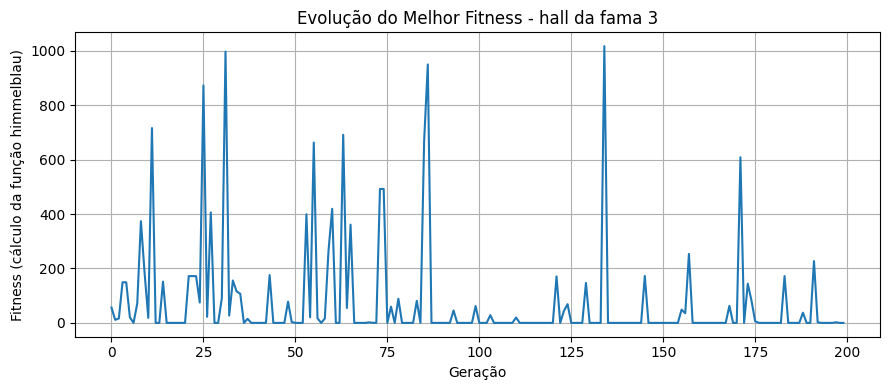

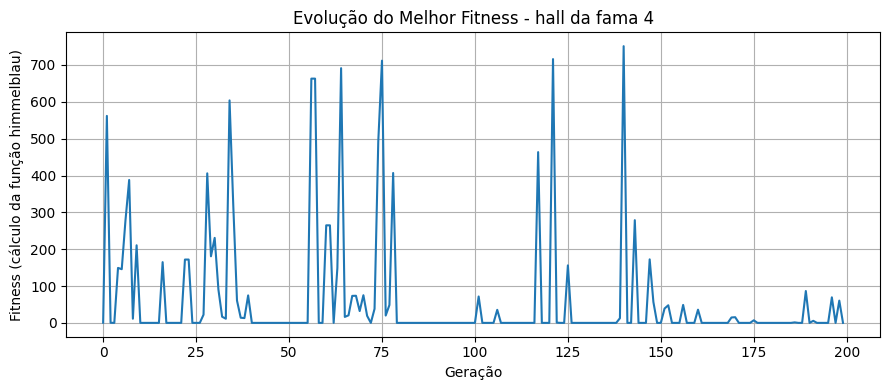

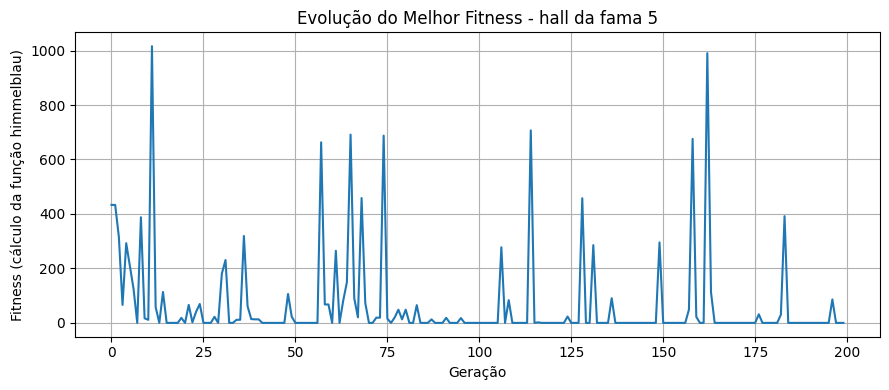

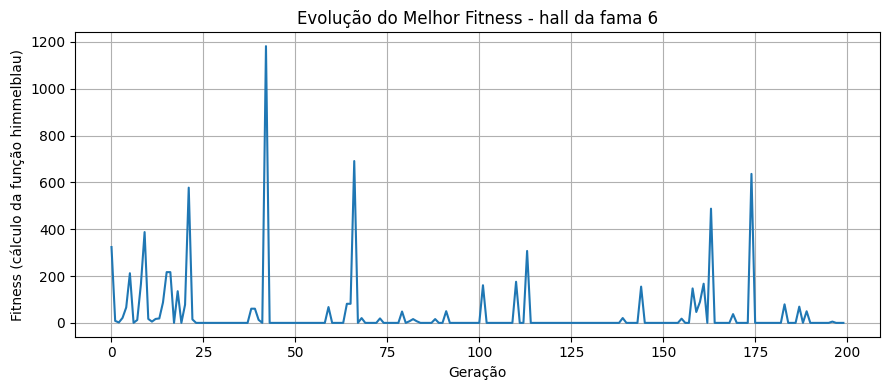

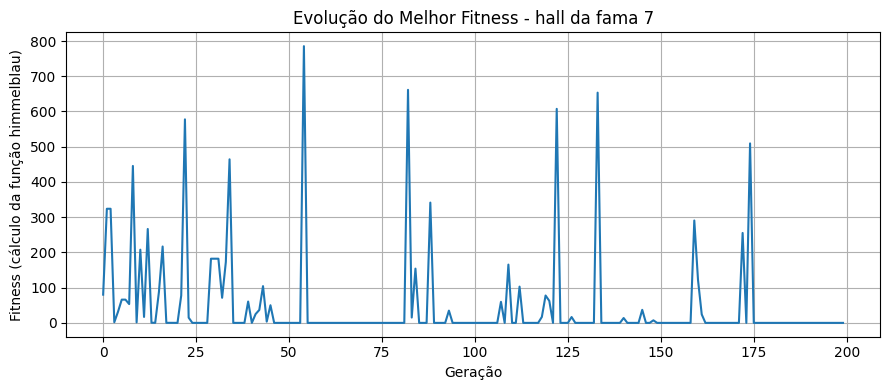

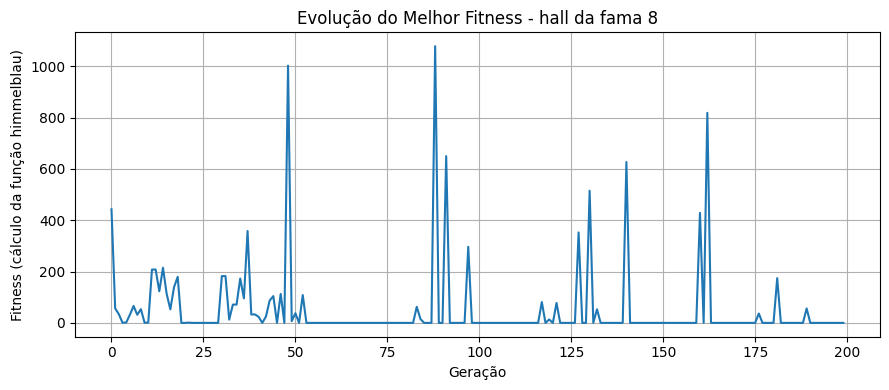

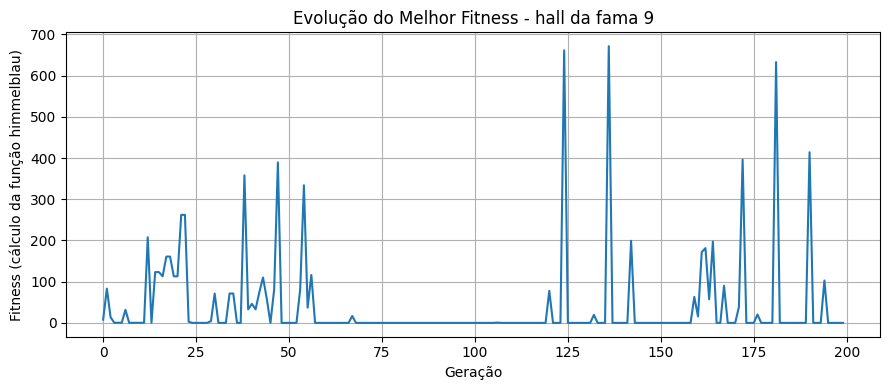

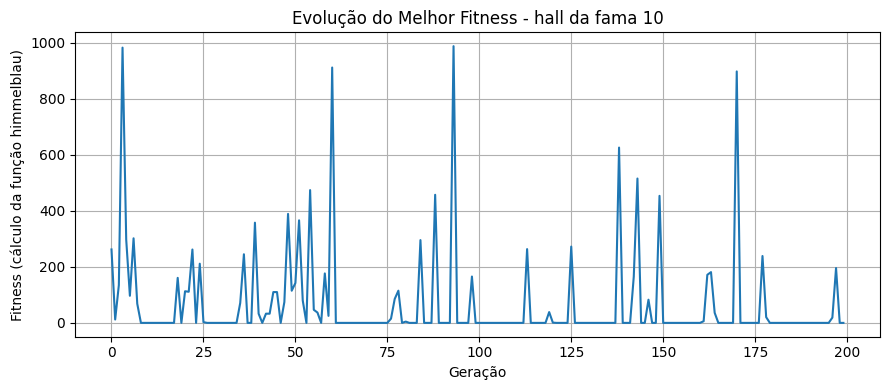

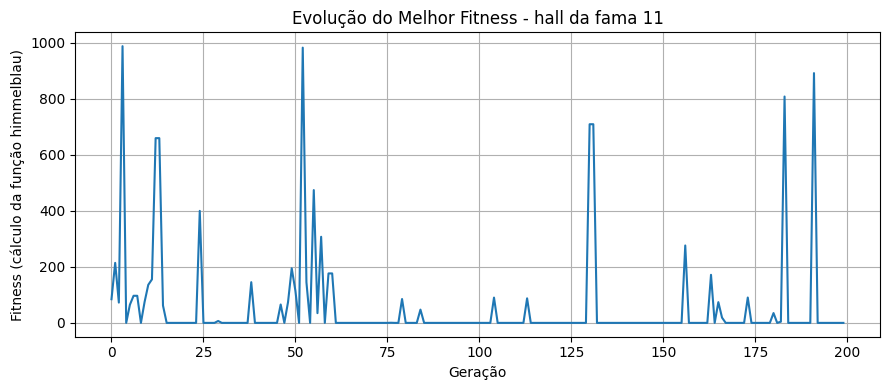

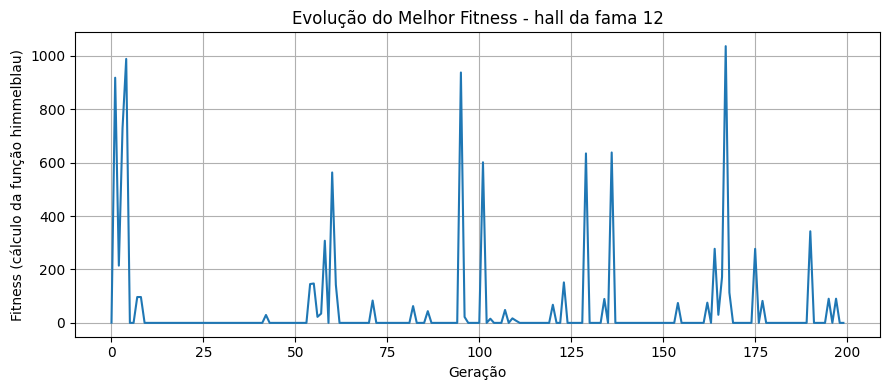

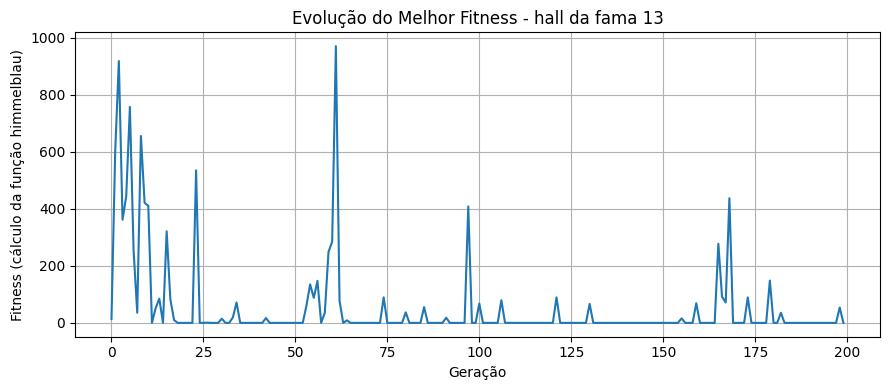

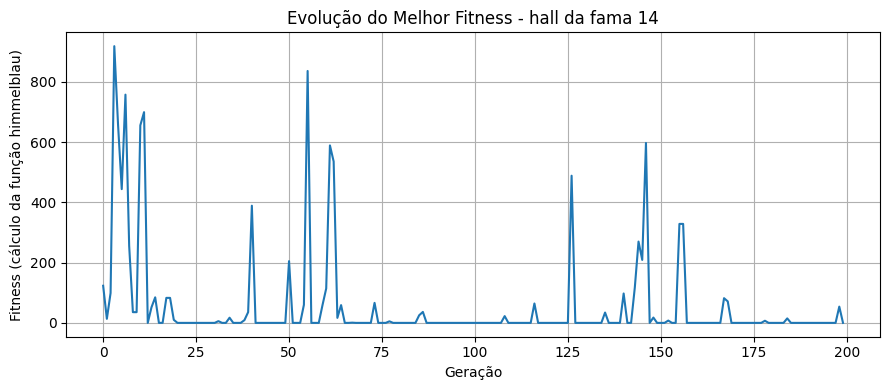

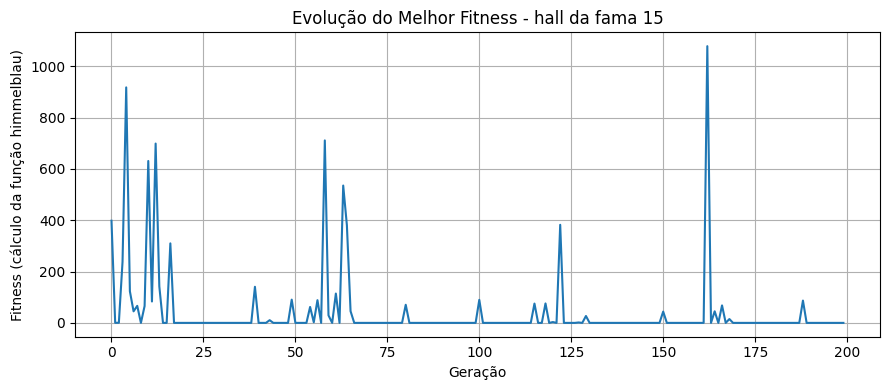

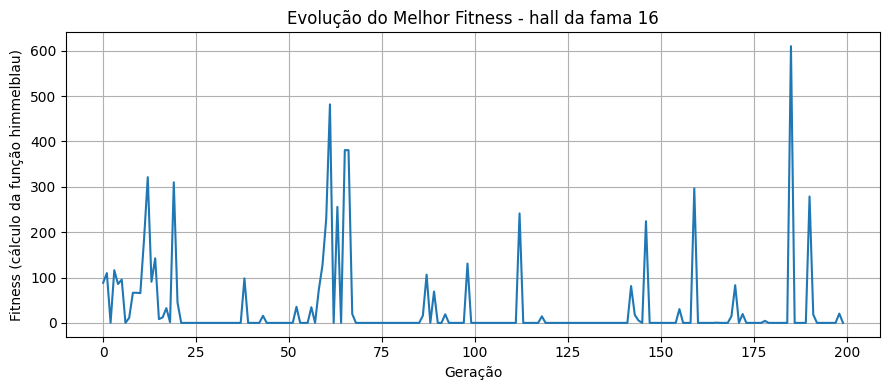

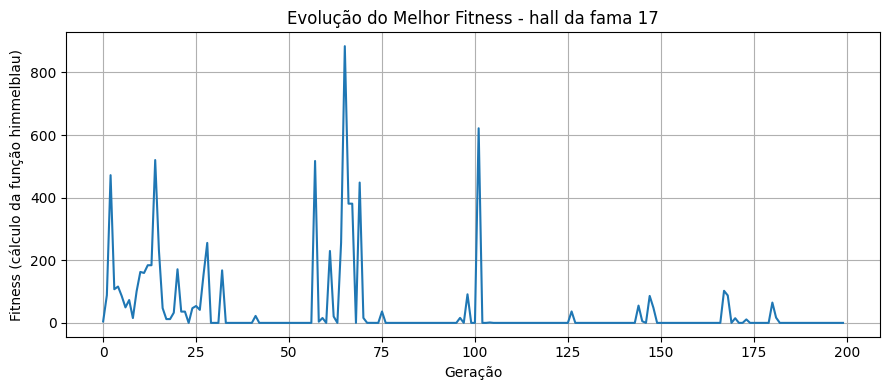

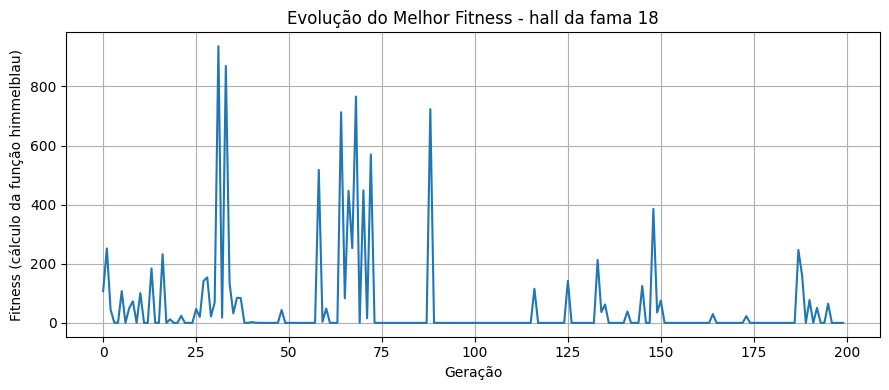

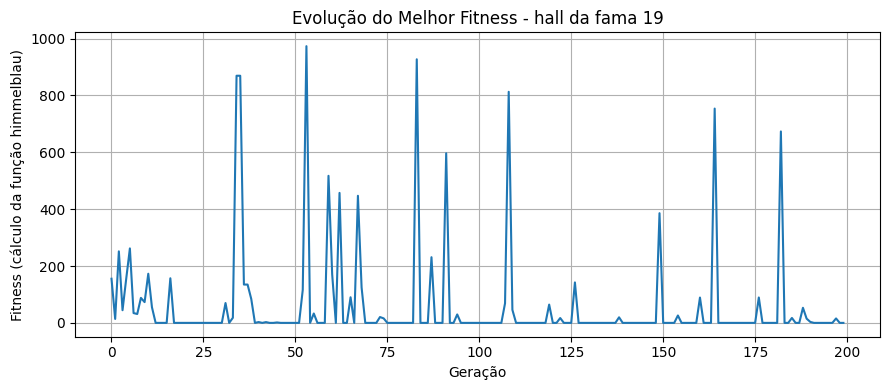

In [28]:
# Calcular o fitness do hall da fama de cada população ao longo das gerações
historico_fitness = {}

for i in range(NUM_POPULACOES):
    chave = f'hall da fama {i}'
    historico_fitness[chave] = [funcao_himmelblau(individuo[0], individuo[1]) for individuo in hall_da_fama_pop[chave]]
    
for chave, fitness_lista in historico_fitness.items():
    plt.figure(figsize=(9, 4))
    plt.plot(fitness_lista, linestyle='-')
    plt.title(f"Evolução do Melhor Fitness - {chave}")
    plt.xlabel("Geração")
    plt.ylabel("Fitness (cálculo da função himmelblau)")
    plt.tight_layout()
    plt.grid(True)
    plt.show()


Pelos gráficos plotados é possível visualizar que o melhor indivíduo de cada população muitas vezes pode resultar em um indivíduo com um fitnesse não ideal. Mas mesmo assim, verificando o fitness de todos os melhores indivíduos, é possível obter mínimos globais da função.

Vamos agora, verificar o melhor indivíduo de cada hall da fama

In [29]:
i = 0
for chave, valor in hall_da_fama_pop.items():
    # pegar cada população 
    populacao_da_vez = hall_da_fama_pop[f'hall da fama {i}'] 
    
    # Verificar o fitness
    fitness = funcao_objetivo_pop_hil(populacao_da_vez)
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    melhor_individuo_observado = populacao_da_vez[indice]
    
    # printar
    print(f'hall da fama {i}: {melhor_individuo_observado}')
    i += 1

hall da fama 0: [3.000565293011988, 1.9994762238688395]
hall da fama 1: [3.000565293011988, 1.9994762238688395]
hall da fama 2: [3.000565293011988, 1.9994762238688395]
hall da fama 3: [3.000565293011988, 1.9994762238688395]
hall da fama 4: [3.000565293011988, 1.9994762238688395]
hall da fama 5: [3.000565293011988, 1.9994762238688395]
hall da fama 6: [3.000565293011988, 1.9994762238688395]
hall da fama 7: [3.000565293011988, 1.9994762238688395]
hall da fama 8: [3.000565293011988, 1.9994762238688395]
hall da fama 9: [3.000565293011988, 1.9994762238688395]
hall da fama 10: [3.000565293011988, 1.9994762238688395]
hall da fama 11: [3.000565293011988, 1.9994762238688395]
hall da fama 12: [3.000565293011988, 1.9994762238688395]
hall da fama 13: [3.000565293011988, 1.9994762238688395]
hall da fama 14: [3.000565293011988, 1.9994762238688395]
hall da fama 15: [3.000565293011988, 1.9994762238688395]
hall da fama 16: [3.000565293011988, 1.9994762238688395]
hall da fama 17: [3.000565293011988, 1.99

O melhor indivíduo foi o EXATAMENTE o mesmo para todas as populações de hall da fama, isso provavelmente ocorreu talvez porque esse indivíduo foi passado de uma população para outra ao longo das gerações por meio da migração. Dessa forma, vamos fazer um código que não printa o melhor indivíduo do hall da fama, mas printar o melhor indivíduo de cada hall da fama que não foi printado anteriormente.

In [30]:
melhores_individuos_unicos = []  # Lista final com indivíduos distintos (após arredondamento)
individuos_ja_usados = set()     # Conjunto com tuplas de valores arredondados para verificar repetição

for i in range(NUM_POPULACOES):
    # Pegar a população atual
    populacao_da_vez = hall_da_fama_pop[f'hall da fama {i}']
    
    fitness = funcao_objetivo_pop_hil(populacao_da_vez)

    # Ordenar os indivíduos da população pelo fitness (menor = melhor)
    individuos_ordenados = sorted(zip(populacao_da_vez, fitness), key=lambda x: x[1])

    # Procurar o melhor indivíduo ainda não usado (após arredondamento)
    for individuo, _ in individuos_ordenados:
        # Arredondar os valores do indivíduo
        individuo_arredondado = tuple(round(gene, 1) for gene in individuo)

        # Verificar se já foi usado
        if individuo_arredondado not in individuos_ja_usados:
            melhores_individuos_unicos.append(individuo)
            individuos_ja_usados.add(individuo_arredondado)
            break  # Vai para a próxima população

# Mostrar o resultado
for i, ind in enumerate(melhores_individuos_unicos):
    print(f"Hall da fama {i}: {ind}")


Hall da fama 0: [3.000565293011988, 1.9994762238688395]
Hall da fama 1: [3.575052250164358, -1.8732706306937121]
Hall da fama 2: [3.5726736896200784, -1.8465899389939437]
Hall da fama 3: [2.9276056379113715, 2.040417403317768]
Hall da fama 4: [3.009458316823263, 1.9273011202309078]
Hall da fama 5: [-3.7697738268190952, -3.3480091783503187]
Hall da fama 6: [3.012265379952833, 2.293691116026171]
Hall da fama 7: [-3.7697738268190952, -3.1763992846681535]
Hall da fama 8: [3.000844336001789, 2.0733650687779175]
Hall da fama 9: [3.000565293011988, 1.7871064387540656]
Hall da fama 10: [3.000565293011988, 2.221193524414586]
Hall da fama 11: [3.3217576794378623, 1.9994762238688395]
Hall da fama 12: [3.6872832431507057, -2.011261851853637]
Hall da fama 13: [2.463306915908232, 1.998629197295191]
Hall da fama 14: [3.000565293011988, 2.494371896173316]
Hall da fama 15: [2.9131620608360524, 2.104300028031215]
Hall da fama 16: [3.2087718451314213, 1.990873962459201]
Hall da fama 17: [3.00056529301198

Compara-se com os mínimos globais da função.

$f(3.0, 2.0) = 0$

$f(-2.805118, 3.131312) = 0$

$f(-3.779310,-3.283186)=0$

$f(3.584428,-1.848126)=0$

Vamos agora finalmente plotar todos os pontos de todos os hall da fama.

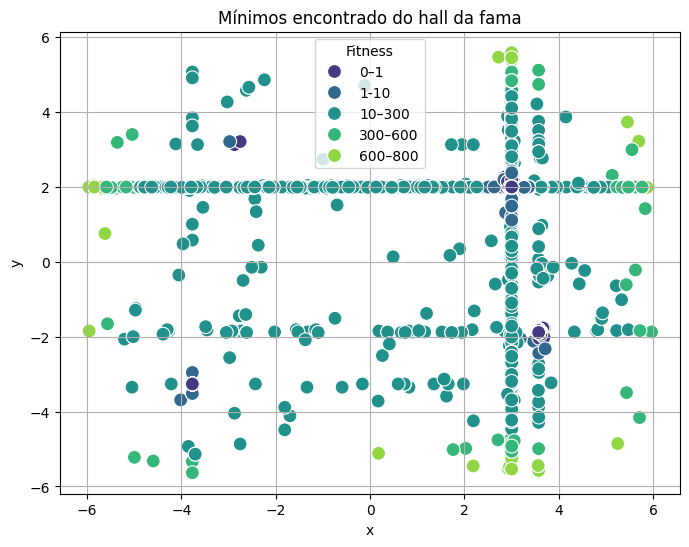

In [31]:
# vamos pegar todos os items de cada cada hall da fama criado e colocar em uma só lista e plotar isso 
hall_da_fama_total = []
j = 0
for chave, valor in hall_da_fama_pop.items():
    # pegar cada população 
    populacao_da_vez = hall_da_fama_pop[f'hall da fama {j}'] 
    
    # adicionar cada termo da população no hall da fama
    for i in range(len(populacao_da_vez)):
        hall_da_fama_total.append(populacao_da_vez[i])
        
    j += 1

# calcular o fitness
fitness_total = funcao_objetivo_pop_hil(hall_da_fama_total)


# Separar os pares (x, y) do hall da fama
xs = [ind[0] for ind in hall_da_fama_total]
ys = [ind[1] for ind in hall_da_fama_total]

df = pd.DataFrame({'x': xs, 'y': ys, 'medida': fitness_total})


bins = [0, 1, 10, 300, 600, 800]
labels = ['0–1', '1-10','10–300', '300–600', '600–800']

df['fitness'] = pd.cut(df['medida'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 6))

# Cria o scatter plot
plot = sns.scatterplot(data=df, x='x', y='y', hue='fitness', palette='viridis', s=100)
plt.title("Mínimos encontrado do hall da fama")
plt.grid(True)
plot.legend(title='Fitness')
plt.show()

E comparando com o gráfico anterior de mínimos globais.

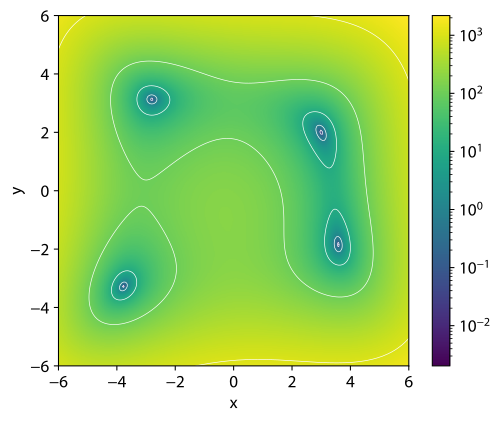

Rodei o código em um momento e ele conseguiu encontrar as 4 regiões de mínimos, como é visível na imagem abaixo:

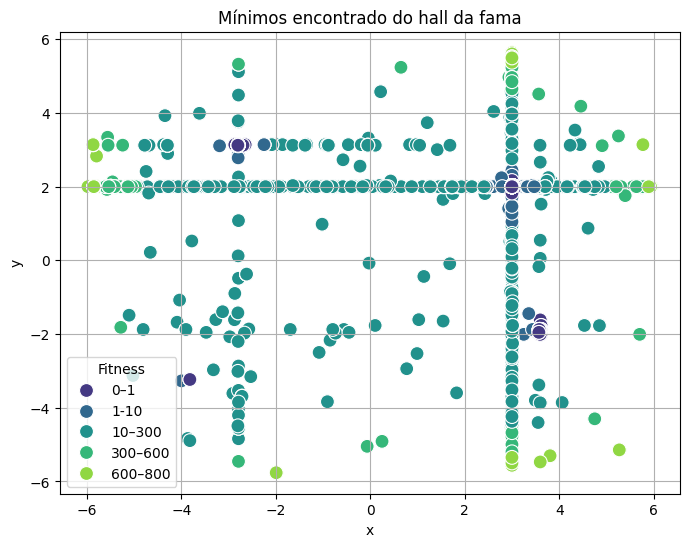

----

### Conclusão:

Foi possível através do operador de migração encontrar de uma vez só as 4 regiões de mínimos globais, obviamente pela natureza probabilística dos algoritmos genéticos, não foram encontrados resultados exatos dos mínimos globais, mas foram resultados razoáveis e próximos, com um fitness menor ou igual a 1. Além disso, dependendo da vez que o usuário rode o código, pode haver a possibilidade de não ser encontrados novamente os mesmo mínimos globais. Mas com o código proposto, é recorrente o estabelecimento dos mínimos globais. 

----

### Referências:

[1] Função de Himmelblau. Wikipédia. Disponível em: <https://en.wikipedia.org/wiki/Himmelblau%27s_function>. Acesso em 13 de maio de 2025.

[2] LUCAS, Diogo Correa. Algoritmos Genéticos: um estudo de seus conceitos fundamentais e aplicação no problema de grade horária. Pelota, Dezembro de 2020. 